In [6]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
128*128*4

65536

In [29]:
m = 4
Y_true_score = torch.randint(low=0, high=2, size=(m, 1, 3, 3))
text_mask = Y_true_score
text_mask = text_mask.expand(-1, 8, -1, -1)
print("text_mask.sum()", text_mask.sum())
Y_true_geometry = torch.randint(low=0, high=512, size=(m, 8, 3, 3))
print(Y_true_score.shape, text_mask.shape)
print(Y_true_geometry.shape)

text_mask.sum() tensor(184)
torch.Size([4, 1, 3, 3]) torch.Size([4, 8, 3, 3])
torch.Size([4, 8, 3, 3])


In [30]:
(Y_true_geometry * text_mask).shape

torch.Size([4, 8, 3, 3])

In [31]:
print(Y_true_geometry.sum())
print((Y_true_geometry * text_mask).sum())

tensor(71464)
tensor(46471)


In [34]:
(Y_true_geometry * Y_true_score).sum()

tensor(46471)

In [28]:
print(text_mask.sum())
print(19*8)

tensor(152)
152


In [18]:
text_mask

tensor([[[[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [False, False, False]]],


        [[[ True, False,  True],
          [ True, False,  True],
          [False, False,  True]],

         [[ True, False,  True],
          [ True, False,  True],
          [False, False

In [22]:
Y_true_geometry[text_mask].shape

torch.Size([152])

In [2]:
data = pd.read_csv("experiment_loss/experiment_1.csv")

In [3]:
data.head()

,epoch_number,mini_batch_number,score_loss,geometry_loss,loss
0,1,1,9.469061,255.954950,265.424011
1,1,2,9.007338,255.939075,264.946413
2,1,3,8.718753,255.925082,264.643834
3,1,4,8.776470,255.913685,264.690156
4,1,5,7.910673,255.905035,263.815708


In [7]:
loss_data = data.groupby("epoch_number").mean()
loss_data.head()

,mini_batch_number,score_loss,geometry_loss,loss
epoch_number,,,,
1,209,8.044558,253.295127,261.339685
2,209,8.045735,247.963428,256.009163
3,209,8.046287,242.642643,250.688930
4,209,8.045045,237.339430,245.384476
5,209,8.044556,232.059850,240.104406


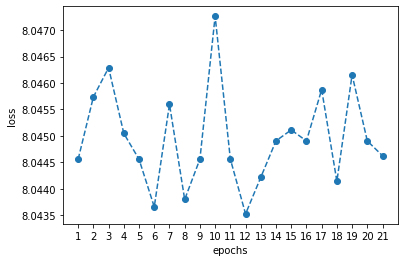

In [12]:
plt.figure()
plt.plot(loss_data.index[:-1], loss_data['geo_loss'][:-1], marker="o", linestyle="--")
plt.xticks(loss_data.index[:-1])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("experiment_plot/experiment_1_score_loss.png")

In [2]:
bbs = [[320,2,373,1,376,23,319,25],
[377,4,430,2,431,30,375,31],
[347,3,388,2,390,36,347,37],
[336,7,376,5,378,48,334,50],
[313,11,355,7,357,61,312,63]]

In [16]:
from sympy import Polygon
from sympy.geometry import intersection
import numpy as np

for idx1, bb1 in enumerate(bbs):
    for idx2, bb2 in enumerate(bbs):
        #print(idx1, idx2, compute_iou(bb1, bb2))
        bb1_ = [(x, y) for x, y in np.array(bb1).reshape(-1, 2)]
        bb2_ = [(x, y) for x, y in np.array(bb2).reshape(-1, 2)]
        #print(bb1_, bb2_)
        poly1 = Polygon(*bb1_)
        poly2 = Polygon(*bb2_)
        print(poly1.vertices, poly2.vertices)
        print("intersection: ", intersection(poly1, poly2))
        print(poly1, poly2)
        print(poly1.area, poly2.area)

0 0 0.9999999914965987
[(320, 2), (373, 1), (376, 23), (319, 25)] [(320, 2), (373, 1), (376, 23), (319, 25)]
[Point2D(320, 2), Point2D(373, 1), Point2D(376, 23), Point2D(319, 25)] [Point2D(320, 2), Point2D(373, 1), Point2D(376, 23), Point2D(319, 25)]
intersection:  [Segment2D(Point2D(319, 25), Point2D(320, 2)), Segment2D(Point2D(320, 2), Point2D(373, 1)), Segment2D(Point2D(373, 1), Point2D(376, 23)), Segment2D(Point2D(376, 23), Point2D(319, 25))]
Polygon(Point2D(320, 2), Point2D(373, 1), Point2D(376, 23), Point2D(319, 25)) Polygon(Point2D(320, 2), Point2D(373, 1), Point2D(376, 23), Point2D(319, 25))
1239 1239
0 1 0.007418976933155107
[(320, 2), (373, 1), (376, 23), (319, 25)] [(377, 4), (430, 2), (431, 30), (375, 31)]
[Point2D(320, 2), Point2D(373, 1), Point2D(376, 23), Point2D(319, 25)] [Point2D(377, 4), Point2D(430, 2), Point2D(431, 30), Point2D(375, 31)]
intersection:  [Point2D(576533/1535, 35327/1535), Point2D(46967/125, 2633/125)]
Polygon(Point2D(320, 2), Point2D(373, 1), Point2D(

intersection:  [Point2D(5269/14, 355/28), Point2D(90907/241, 14923/482)]
Polygon(Point2D(336, 7), Point2D(376, 5), Point2D(378, 48), Point2D(334, 50)) Polygon(Point2D(377, 4), Point2D(430, 2), Point2D(431, 30), Point2D(375, 31))
1806 1498
3 2 0.4009812649376393
[(336, 7), (376, 5), (378, 48), (334, 50)] [(347, 3), (388, 2), (390, 36), (347, 37)]
[Point2D(336, 7), Point2D(376, 5), Point2D(378, 48), Point2D(334, 50)] [Point2D(347, 3), Point2D(388, 2), Point2D(390, 36), Point2D(347, 37)]
intersection:  [Point2D(347, 129/20), Point2D(232890/617, 22392/617)]
Polygon(Point2D(336, 7), Point2D(376, 5), Point2D(378, 48), Point2D(334, 50)) Polygon(Point2D(347, 3), Point2D(388, 2), Point2D(390, 36), Point2D(347, 37))
1806 1429
3 3 0.9999999941927992
[(336, 7), (376, 5), (378, 48), (334, 50)] [(336, 7), (376, 5), (378, 48), (334, 50)]
[Point2D(336, 7), Point2D(376, 5), Point2D(378, 48), Point2D(334, 50)] [Point2D(336, 7), Point2D(376, 5), Point2D(378, 48), Point2D(334, 50)]
intersection:  [Segment

In [5]:
from sympy import Polygon
from sympy.geometry import intersection
import numpy as np

for idx1, bb1 in enumerate(bbs):
    bb1_ = [(x, y) for x, y in np.array(bb1).reshape(-1, 2)]
    poly1 = Polygon(*bb1_)
    print(poly1)
    print(poly1.bounds)

Polygon(Point2D(320, 2), Point2D(373, 1), Point2D(376, 23), Point2D(319, 25))
(319, 1, 376, 25)
Polygon(Point2D(377, 4), Point2D(430, 2), Point2D(431, 30), Point2D(375, 31))
(375, 2, 431, 31)
Polygon(Point2D(347, 3), Point2D(388, 2), Point2D(390, 36), Point2D(347, 37))
(347, 2, 390, 37)
Polygon(Point2D(336, 7), Point2D(376, 5), Point2D(378, 48), Point2D(334, 50))
(334, 5, 378, 50)
Polygon(Point2D(313, 11), Point2D(355, 7), Point2D(357, 61), Point2D(312, 63))
(312, 7, 357, 63)


In [7]:
a = np.random.randint(1, 10, (4, 2))
print(a.shape)
b = np.array([1, 2])
print(b.shape)
c = a - b
print(c.shape)

(4, 2)
(2,)
(4, 2)
